In [93]:
import pandas as pd
import numpy as np
df=pd.read_csv('/kaggle/input/5year-asian-paint/ASIANPAINT.NS (1).csv')
df = df.dropna(subset=['Adj Close'])
# df['New_Price'] = (df.splitFactor).replace(np.inf, 1).cumprod() * df.close
# df['close'] = df['New_Price'] / 20



In [94]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1231,2024-06-05,2864.500000,3027.300049,2864.500000,2961.750000,2933.368164,2410576.0
1232,2024-06-06,2960.000000,2961.750000,2882.250000,2904.800049,2876.963867,1689408.0
1233,2024-06-07,2904.800049,2943.100098,2888.850098,2927.699951,2899.644287,1600180.0
1234,2024-06-10,2928.000000,2951.899902,2915.000000,2937.550049,2909.400146,876867.0
1236,2024-06-12,2909.000000,2918.000000,2865.649902,2905.800049,2905.800049,1701408.0


In [95]:
df1=df.reset_index()['Adj Close']

In [96]:
df1.tail()

1231    2933.368164
1232    2876.963867
1233    2899.644287
1234    2909.400146
1235    2905.800049
Name: Adj Close, dtype: float64

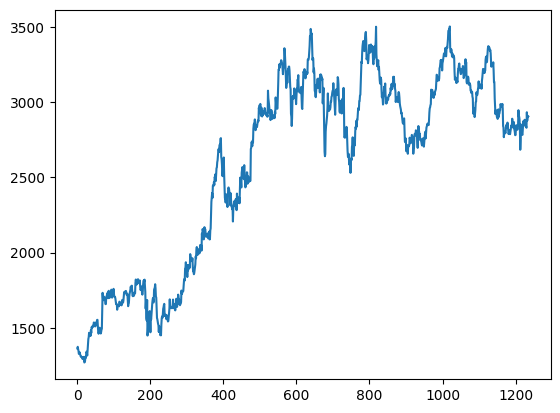

In [97]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [98]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [99]:
df1.shape

(1236, 1)

In [100]:
training_size=int(len(df1)*0.7)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [101]:
training_size,test_size

(865, 371)

In [102]:
train_data[:10]

array([[0.04165054],
       [0.0466632 ],
       [0.03947776],
       [0.03483068],
       [0.02540771],
       [0.02588099],
       [0.03057097],
       [0.02667694],
       [0.02372968],
       [0.01811457]])

In [103]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [104]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [105]:
print(X_train.shape)
print(y_test.shape)

(764, 100)
(270,)


In [106]:
# need 3d model for stacked lstm
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [76]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input

In [107]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [108]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [109]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size=64,verbose=1)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 199ms/step - accuracy: 0.0000e+00 - loss: 0.2119 - val_accuracy: 0.0037 - val_loss: 0.0120
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 148ms/step - accuracy: 0.0000e+00 - loss: 0.0151 - val_accuracy: 0.0037 - val_loss: 0.0069
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 149ms/step - accuracy: 0.0000e+00 - loss: 0.0100 - val_accuracy: 0.0037 - val_loss: 0.0084
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 149ms/step - accuracy: 0.0000e+00 - loss: 0.0050 - val_accuracy: 0.0037 - val_loss: 0.0029
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 147ms/step - accuracy: 0.0000e+00 - loss: 0.0036 - val_accuracy: 0.0037 - val_loss: 0.0028
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step - accuracy: 0.0000e+00 - loss: 0.0033 - val_accuracy: 0.0037 - val_loss: 0.0025
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 144ms/step - accuracy: 0.0000e+00 - loss: 0.0036 - val_accuracy: 0.0037 - val_loss: 0.0025
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 149ms/step - accuracy: 0.0000e+00 -

In [110]:
test_loss = model.evaluate(X_test, y_test, verbose=0)[0]

# Print the test loss
print("Test loss:", test_loss)

Test loss: 0.0009616757743060589


In [111]:
import pickle

# Save the model to a.pkl file
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [16]:
import pickle
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input

# Open the file in read-binary ('rb') mode and load the model
with open('/kaggle/input/trained-model/model.pkl', 'rb') as file:
    model = pickle.load(file)

In [112]:
test_loss = model.evaluate(X_test, y_test, verbose=0)[0]

# Print the test loss
print("Test loss:", test_loss)

Test loss: 0.0009616757743060589


In [18]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [113]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [114]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [115]:
print(len(test_predict))
print(len(train_predict))

270
764


In [116]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

2604.313028791965

In [91]:
math.sqrt(mean_squared_error(y_test,test_predict))

2948.631018406123

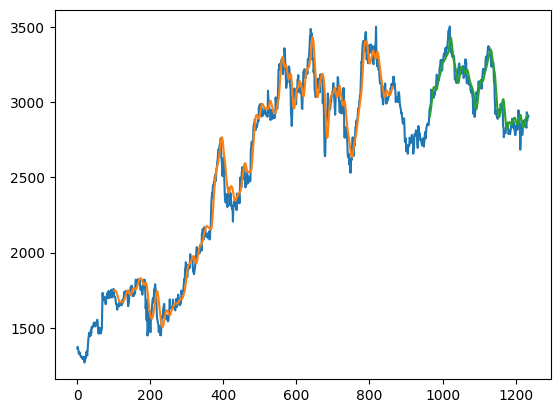

In [140]:
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [141]:
len(test_data)

371

In [142]:
x_input=test_data[271:].reshape(1,-1)
x_input.shape

(1, 100)

In [143]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.8894596879496273,
 0.8848487778710137,
 0.8831196046159131,
 0.893316939802898,
 0.8691096073889788,
 0.8343281106754039,
 0.8352148829833956,
 0.7859354128517453,
 0.7614398848207014,
 0.7391610688833745,
 0.7510652826426234,
 0.7413336285162948,
 0.7429962445062468,
 0.7303604491997018,
 0.733441857371012,
 0.7250401434780573,
 0.7310698452903808,
 0.7533263660972229,
 0.730471377825733,
 0.7402472940867253,
 0.7412006236598654,
 0.7490923943575001,
 0.7512204734033185,
 0.7690213836708131,
 0.7651862084955889,
 0.7608414173560536,
 0.7668488244855409,
 0.7624818478893882,
 0.7693981035572655,
 0.7554545543692606,
 0.703359904231597,
 0.69941401888278,
 0.6705070336684815,
 0.682721518827605,
 0.687088605097625,
 0.687088605097625,
 0.682056494545457,
 0.6851157168125017,
 0.7042909386742526,
 0.7070841512284383,
 0.7067737701546961,
 0.699680028595639,
 0.7139118830746363,
 0.7029608896623083,
 0.6936281408790499,
 0.6797067771476624,
 0.6840515682871977,
 0.6823889518495971,
 0.

In [144]:
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
#         print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

# print(lst_output)

[0.7407805]
101
1 day output [[0.7434604]]
2 day output [[0.74646735]]
3 day output [[0.74972]]
4 day output [[0.7531308]]
5 day output [[0.7566231]]
6 day output [[0.76013726]]
7 day output [[0.7636312]]
8 day output [[0.76707727]]
9 day output [[0.77045894]]
10 day output [[0.7737669]]
11 day output [[0.77699596]]
12 day output [[0.7801432]]
13 day output [[0.7832073]]
14 day output [[0.7861871]]
15 day output [[0.78908175]]
16 day output [[0.791891]]
17 day output [[0.79461426]]
18 day output [[0.79725105]]
19 day output [[0.7998022]]
20 day output [[0.80226785]]
21 day output [[0.8046488]]
22 day output [[0.8069467]]
23 day output [[0.8091624]]
24 day output [[0.81129795]]
25 day output [[0.81335485]]
26 day output [[0.8153352]]
27 day output [[0.8172416]]
28 day output [[0.8190749]]
29 day output [[0.8208383]]


In [145]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [146]:
len(df1)

1236

In [130]:
# print(scaler.inverse_transform(df1[1136:]))

[[3256.689697]
 [3246.389404]
 [3242.526611]
 [3265.306396]
 [3211.229736]
 [3133.531494]
 [3135.512451]
 [3025.427246]
 [2970.706787]
 [2920.938232]
 [2947.531006]
 [2925.791504]
 [2929.505615]
 [2901.278564]
 [2908.162109]
 [2889.393555]
 [2902.863281]
 [2952.582031]
 [2901.526367]
 [2923.364746]
 [2925.494385]
 [2943.123779]
 [2947.877686]
 [2987.643066]
 [2979.075684]
 [2969.369873]
 [2982.789795]
 [2973.034424]
 [2988.484619]
 [2957.336182]
 [2840.962158]
 [2832.147461]
 [2767.572266]
 [2794.858154]
 [2804.61377 ]
 [2804.61377 ]
 [2793.372559]
 [2800.206543]
 [2843.041992]
 [2849.281738]
 [2848.588379]
 [2832.741699]
 [2864.53418 ]
 [2840.070801]
 [2819.222412]
 [2788.123535]
 [2797.829346]
 [2794.115234]
 [2814.270508]
 [2787.677734]
 [2803.375732]
 [2819.470215]
 [2843.487793]
 [2846.656982]
 [2841.85376 ]
 [2890.334473]
 [2855.818359]
 [2864.286377]
 [2829.770264]
 [2868.990967]
 [2827.145752]
 [2817.142578]
 [2802.880615]
 [2780.794189]
 [2781.63623 ]
 [2814.617188]
 [2847.350

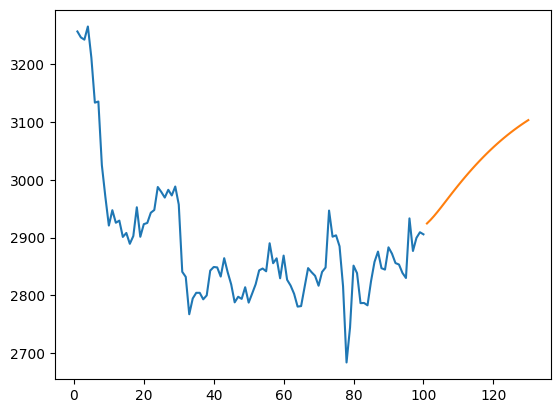

In [147]:
plt.plot(day_new,scaler.inverse_transform(df1[1136:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

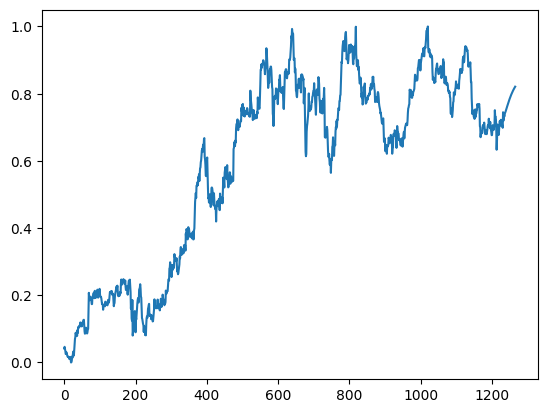

In [148]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[:])

In [149]:
df3=scaler.inverse_transform(df3).tolist()

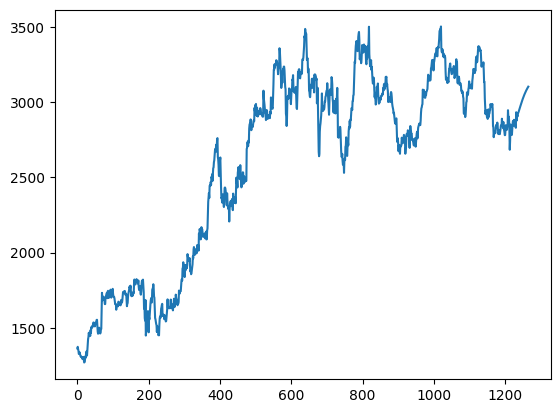

In [150]:
plt.plot(df3)

In [156]:
stock_price=scaler.inverse_transform(lst_output)


[2924.555811628129]

In [176]:
for i in range(len(stock_price)):
    day_price=stock_price[i].item()
    print("Price on Day",i+1,"is",day_price)

Price on Day 1 is 2924.555811628129
Price on Day 2 is 2930.542527558042
Price on Day 3 is 2937.2597075151666
Price on Day 4 is 2944.525734121976
Price on Day 5 is 2952.1451423416574
Price on Day 6 is 2959.946567390577
Price on Day 7 is 2967.7968586986995
Price on Day 8 is 2975.60201196358
Price on Day 9 is 2983.3001121701523
Price on Day 10 is 2990.854409761087
Price on Day 11 is 2998.244000096888
Price on Day 12 is 3005.4574322285334
Price on Day 13 is 3012.4880486275206
Price on Day 14 is 3019.332919981309
Price on Day 15 is 3025.9895164290674
Price on Day 16 is 3032.4558407122463
Price on Day 17 is 3038.731360228565
Price on Day 18 is 3044.8148766228933
Price on Day 19 is 3050.7051915401007
Price on Day 20 is 3056.4041690881677
Price on Day 21 is 3061.912208718805
Price on Day 22 is 3067.2310413894224
Price on Day 23 is 3072.3642621654108
Price on Day 24 is 3077.313868305321
Price on Day 25 is 3082.0845200791045
Price on Day 26 is 3086.6794131004417
Price on Day 27 is 3091.103340789